## Horror movies exploratory data analysis

### Libraries

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Data summary

In [2]:
horror_movies <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-01/horror_movies.csv")

Rows: 32540 Columns: 20
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): original_title, title, original_language, overview, tagline, post...
dbl   (8): id, popularity, vote_count, vote_average, budget, revenue, runtim...
lgl   (1): adult
date  (1): release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
str(horror_movies)

spec_tbl_df [32,540 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id               : num [1:32540] 760161 760741 882598 756999 772450 ...
 $ original_title   : chr [1:32540] "Orphan: First Kill" "Beast" "Smile" "The Black Phone" ...
 $ title            : chr [1:32540] "Orphan: First Kill" "Beast" "Smile" "The Black Phone" ...
 $ original_language: chr [1:32540] "en" "en" "en" "en" ...
 $ overview         : chr [1:32540] "After escaping from an Estonian psychiatric facility, Leena Klammer travels to America by impersonating Esther,"| __truncated__ "A recently widowed man and his two teenage daughters travel to a game reserve in South Africa. However, their j"| __truncated__ "After witnessing a bizarre, traumatic incident involving a patient, Dr. Rose Cotter starts experiencing frighte"| __truncated__ "Finney Blake, a shy but clever 13-year-old boy, is abducted by a sadistic killer and trapped in a soundproof ba"| __truncated__ ...
 $ tagline          : chr [1:32540] "There's always b

In [4]:
summary(horror_movies)

       id          original_title        title           original_language 
 Min.   :     17   Length:32540       Length:32540       Length:32540      
 1st Qu.: 146495   Class :character   Class :character   Class :character  
 Median : 426521   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 445911                                                           
 3rd Qu.: 707534                                                           
 Max.   :1033095                                                           
                                                                           
   overview           tagline           release_date        poster_path       
 Length:32540       Length:32540       Min.   :1950-01-01   Length:32540      
 Class :character   Class :character   1st Qu.:2000-10-20   Class :character  
 Mode  :character   Mode  :character   Median :2012-12-09   Mode  :character  
                                       Mean   :2007-02-18                   

### Pairs Matrix

Rows: 32,540
Columns: 20
$ id                <dbl> 760161, 760741, 882598, 756999, 772450, 1014226, 717…
$ original_title    <chr> "Orphan: First Kill", "Beast", "Smile", "The Black P…
$ title             <chr> "Orphan: First Kill", "Beast", "Smile", "The Black P…
$ original_language <chr> "en", "en", "en", "en", "es", "es", "en", "en", "en"…
$ overview          <chr> "After escaping from an Estonian psychiatric facilit…
$ tagline           <chr> "There's always been something wrong with Esther.", …
$ release_date      <date> 2022-07-27, 2022-08-11, 2022-09-23, 2022-06-22, 202…
$ poster_path       <chr> "/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg", "/xIGr7UHsKf0URW…
$ popularity        <dbl> 5088.584, 2172.338, 1863.628, 1071.398, 1020.995, 93…
$ vote_count        <dbl> 902, 584, 114, 2736, 83, 1, 125, 1684, 73, 1035, 637…
$ vote_average      <dbl> 6.9, 7.1, 6.8, 7.9, 7.0, 1.0, 5.8, 7.0, 6.5, 6.8, 7.…
$ budget            <dbl> 0, 0, 17000000, 18800000, 0, 0, 20000000, 68000000, …
$ revenue      

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



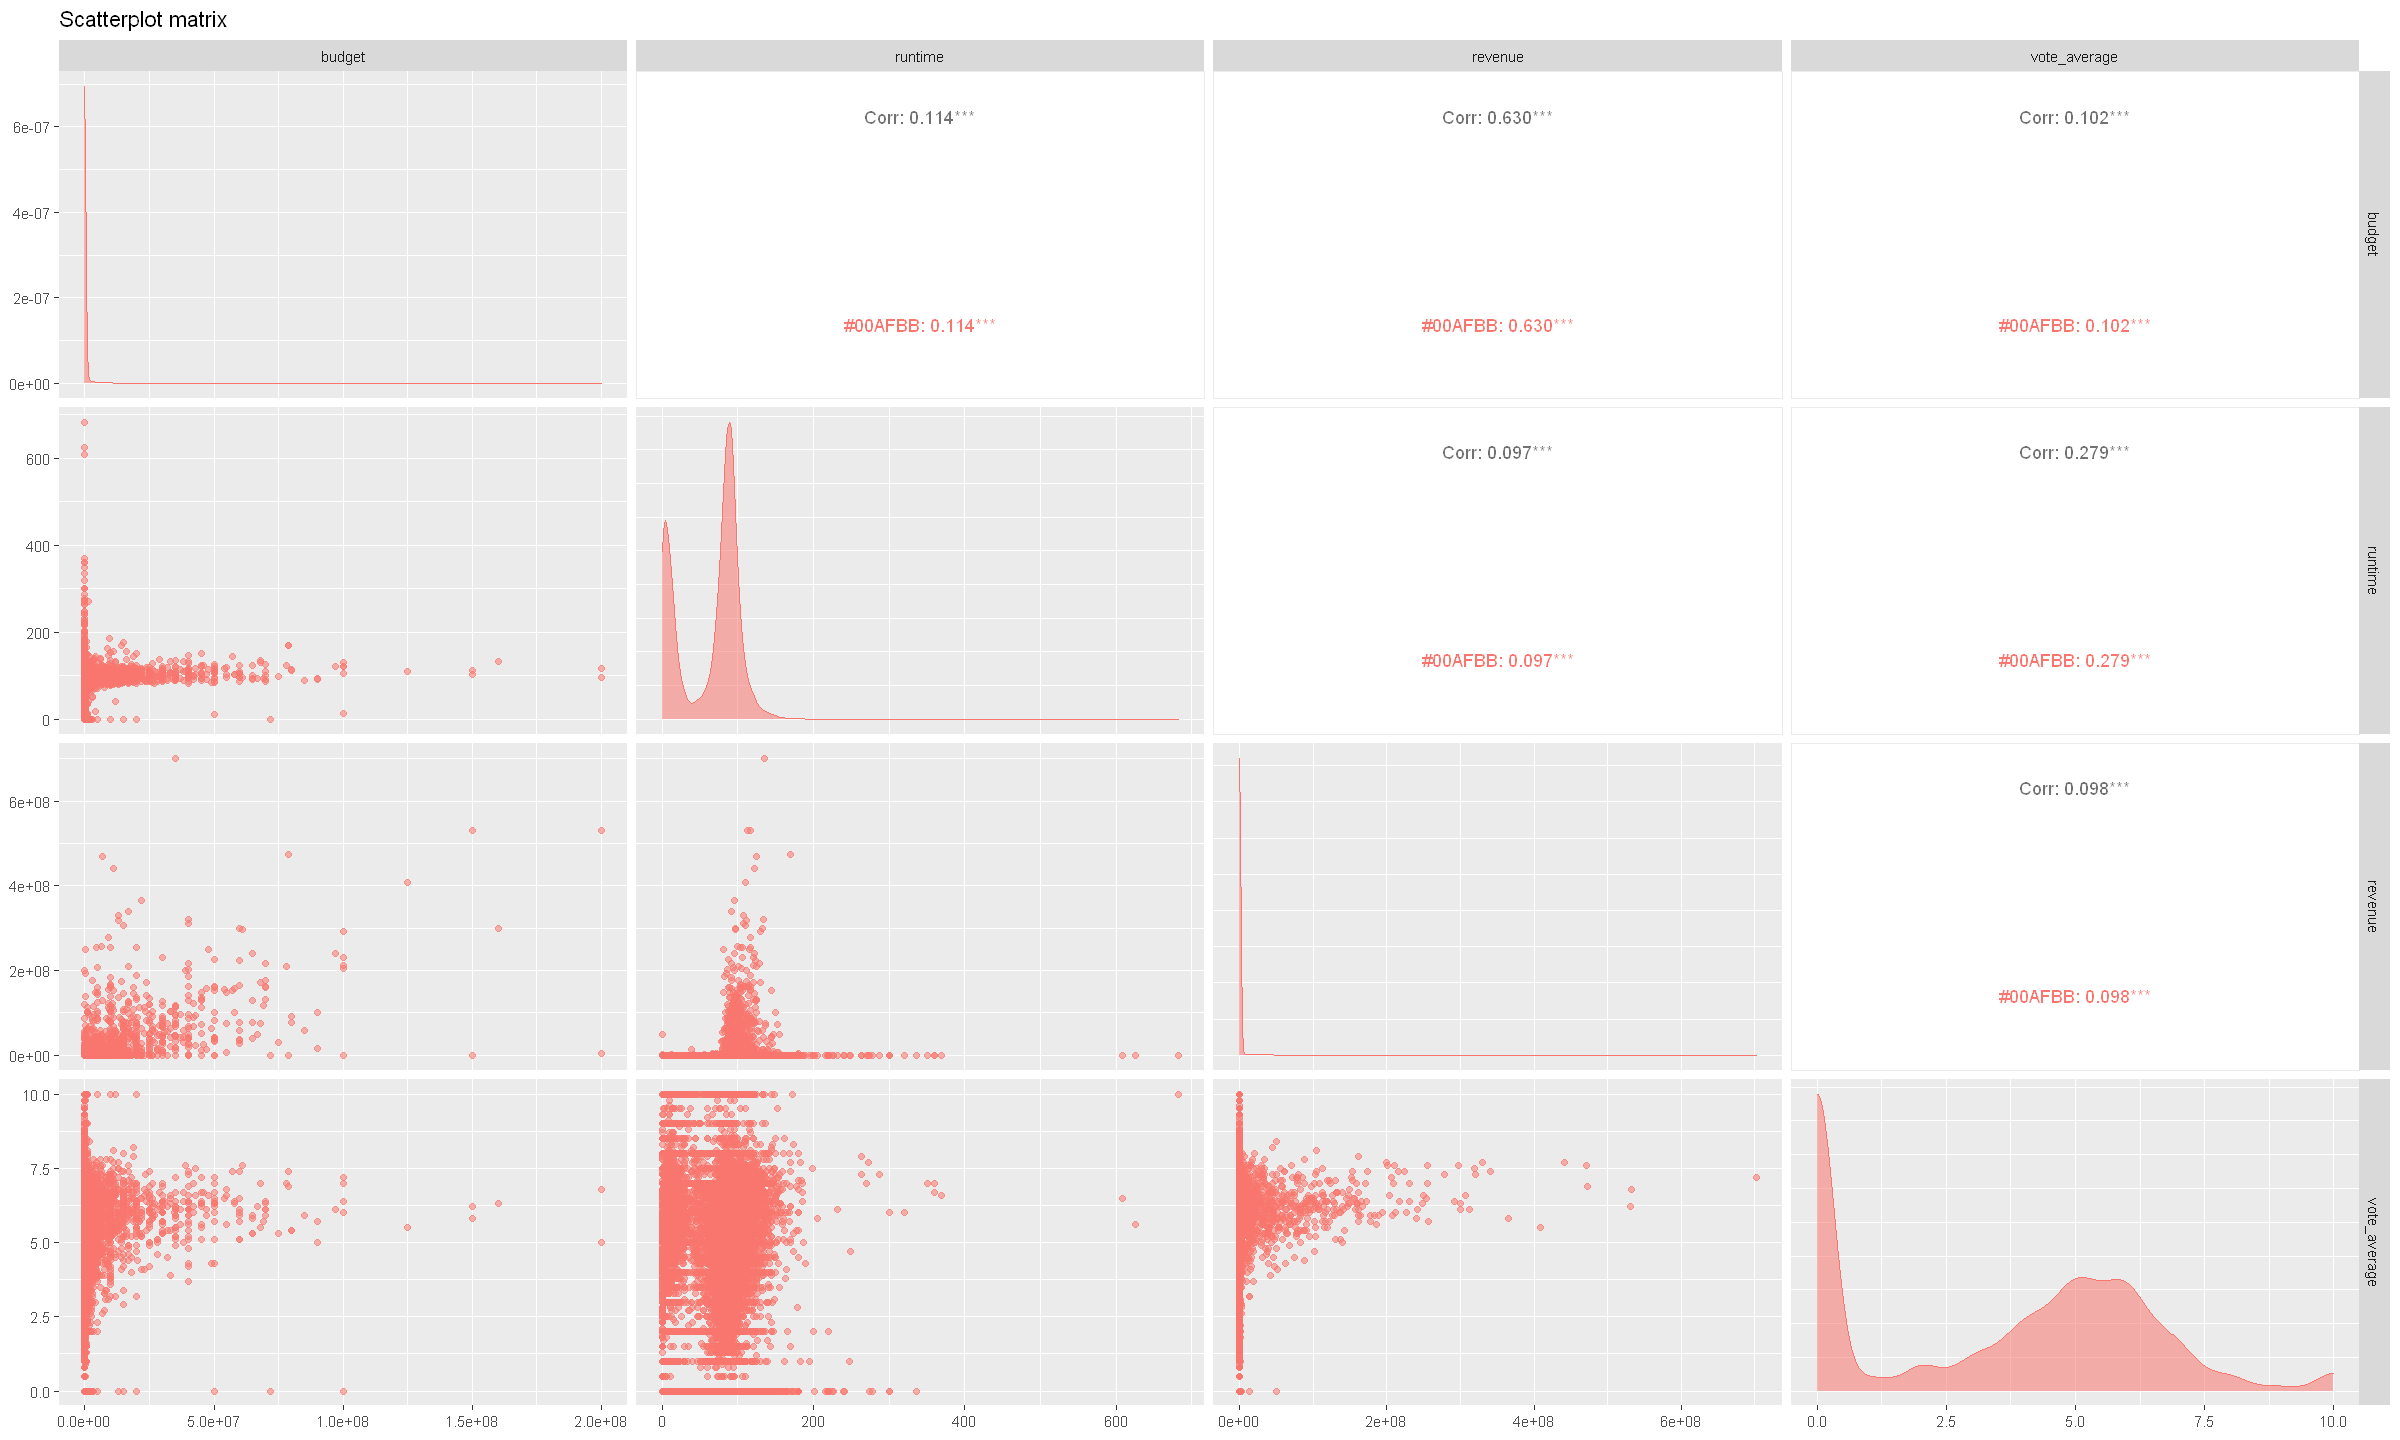

In [5]:
options(repr.plot.width = 20, repr.plot.height = 12)
data_movie <- glimpse(horror_movies) |>
    select(budget, runtime, revenue, vote_average) |> 
    drop_na()

pairs <- GGally::ggpairs(data_movie, aes(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB"), progress = FALSE) +
    ggtitle('Scatterplot matrix') 

# Show the plot
pairs

### Correlation exploration

Warning message:
"`label_number_si()` was deprecated in scales 1.2.0.
Please use the `scale_cut` argument of `label_number()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


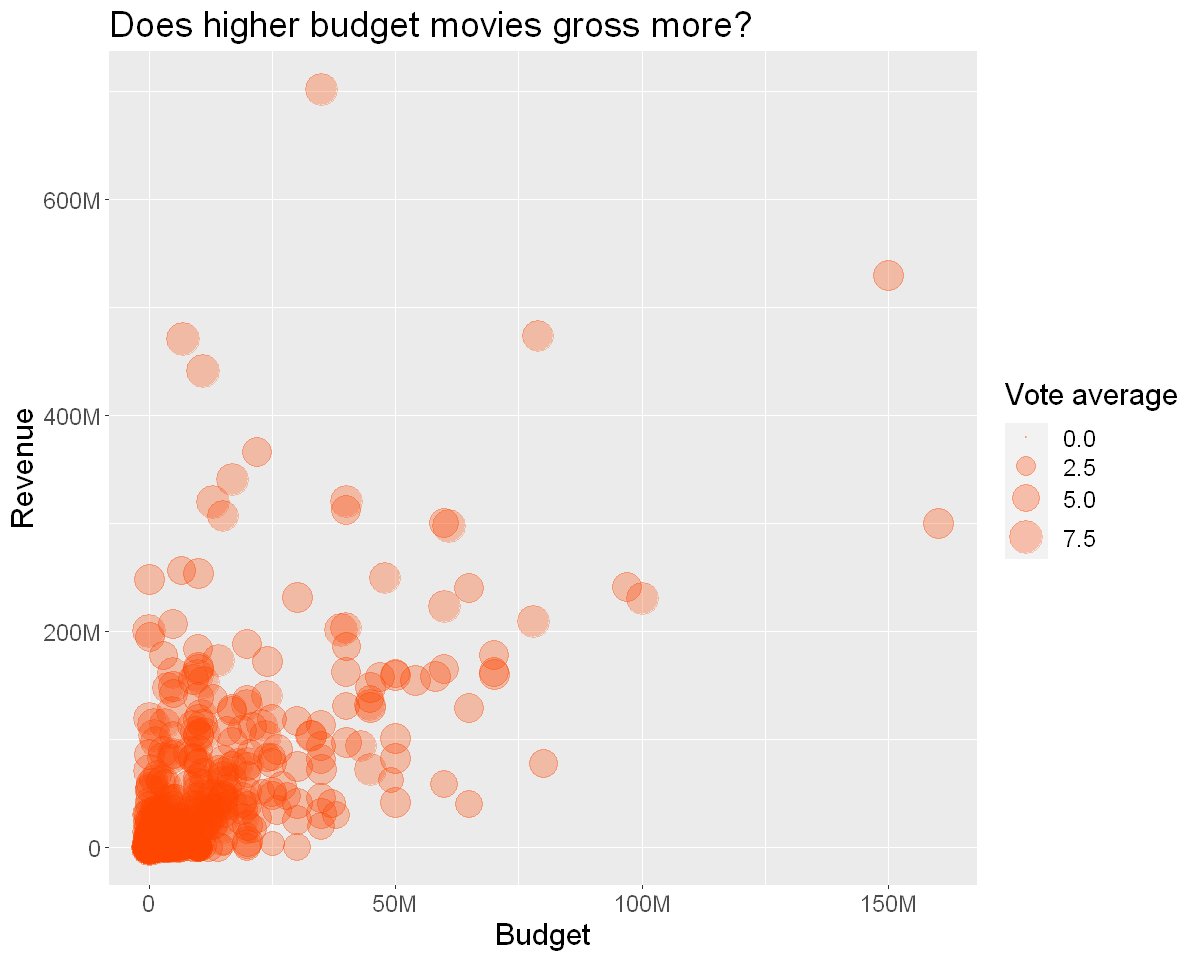

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
horror_scatter_bud <- horror_movies |> 
    drop_na() |> 
    ggplot(aes(x = budget, y = revenue, size = vote_average)) +
        geom_point(alpha = 0.3, color="#ff4500") +
        ggtitle('Does higher budget movies gross more?') +
        labs(x = 'Budget', y = 'Revenue', size = 'Vote average') +
        scale_colour_manual(values = "blue") +
        theme(text =  element_text(size = 18)) +
        scale_size(range = c(0, 10)) +
        scale_y_continuous(labels = scales::label_number_si()) +
        scale_x_continuous(labels = scales::label_number_si()) 
        

horror_scatter_bud

Most movies budget is bellow 50 million.

### Distributions

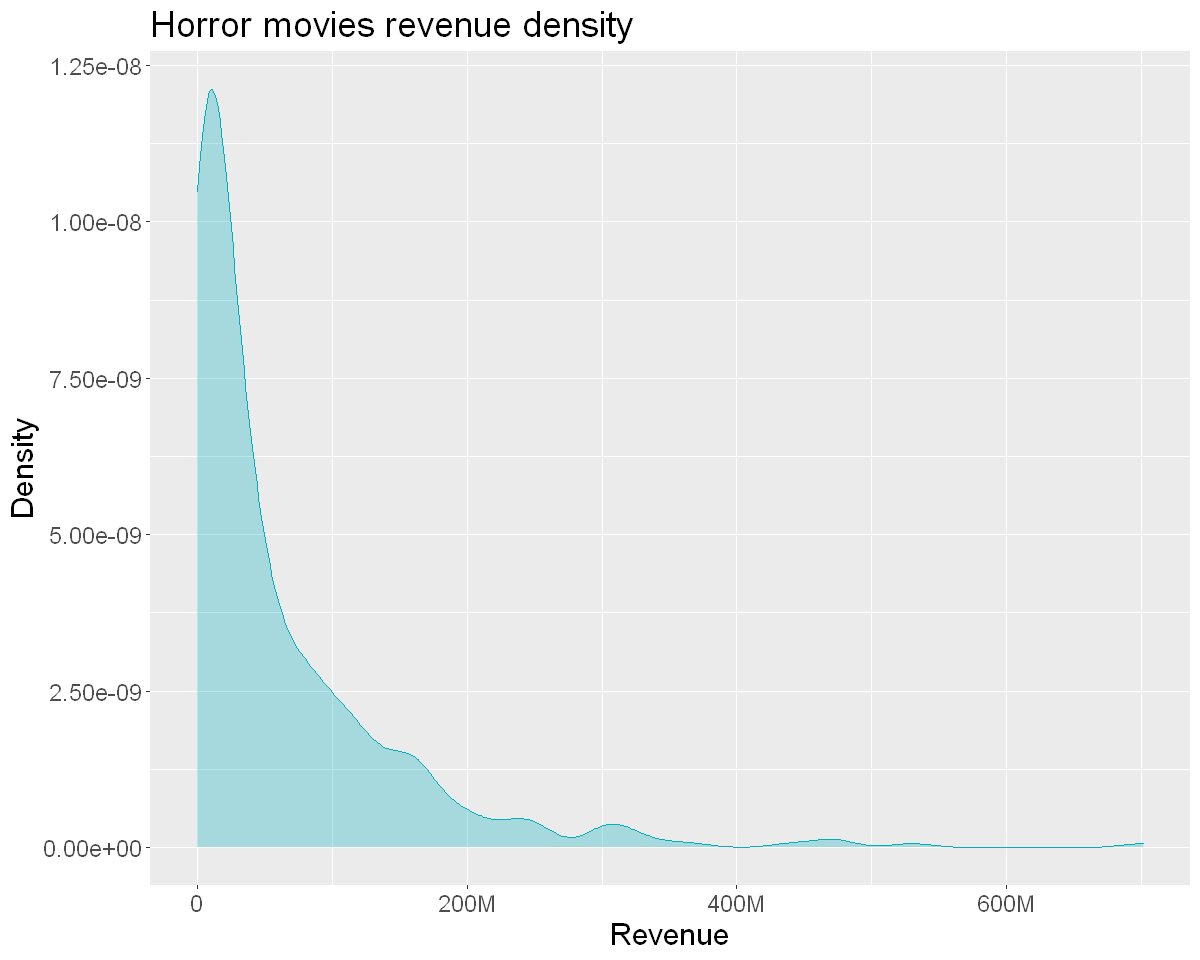

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)
revenue_density <- horror_movies |> 
    filter(revenue>0) |> 
    drop_na() |> 
    ggplot(aes(x = revenue)) + 
    geom_density(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB") + 
    ggtitle('Horror movies revenue density') +
    scale_x_continuous(labels = scales::label_number_si()) +
    theme(text =  element_text(size = 18)) +
    labs(x = 'Revenue', y = 'Density')
    

# Show the plot
revenue_density

Most of the films have a revenue of less than 100 million dollars, although there are films with a revenue of over 200 million.

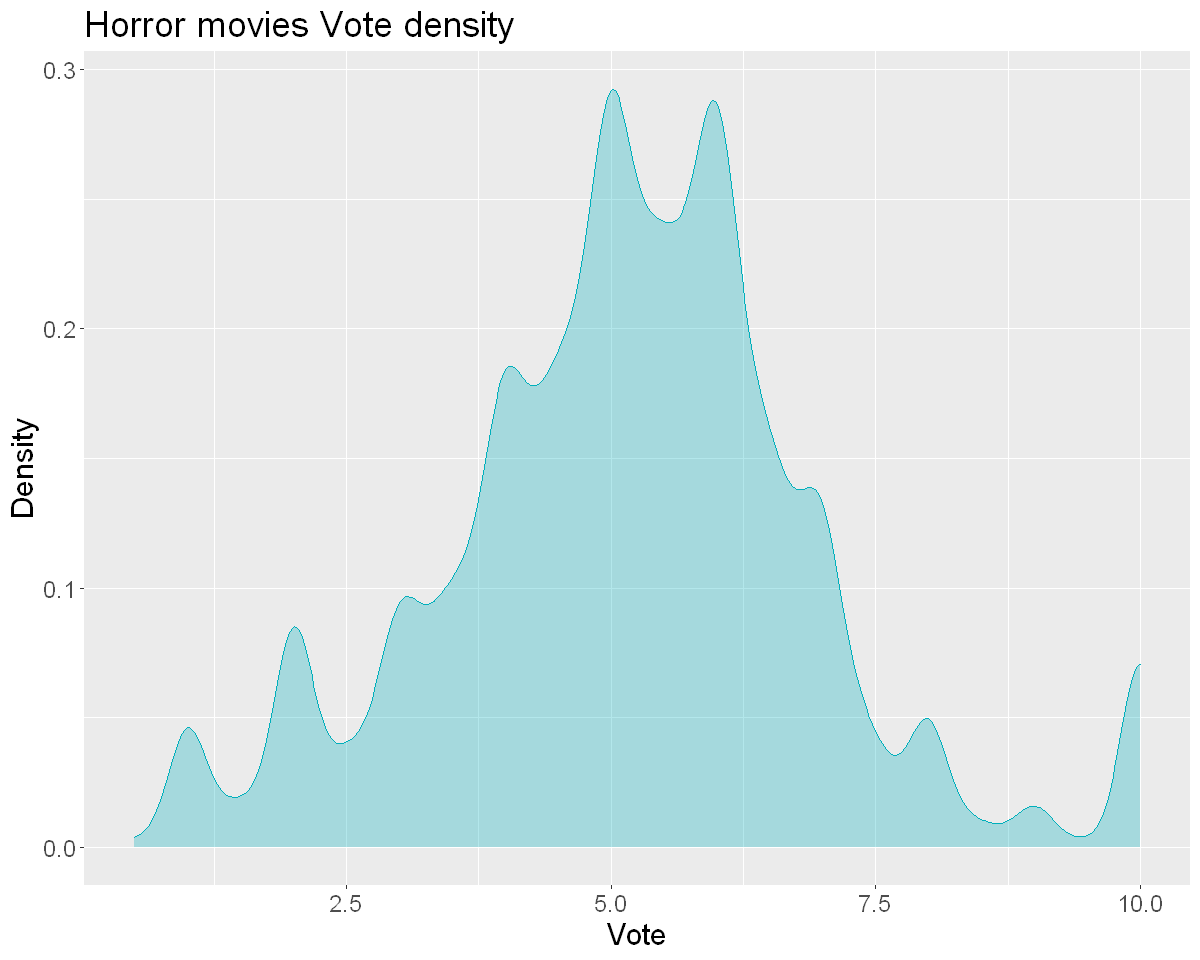

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)
vote_avg_hist <- data_movie|>
    filter(vote_average>0)|>
    ggplot(aes(x = vote_average)) +
    geom_density(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB") + 
    ggtitle('Horror movies Vote density') +
    theme(text =  element_text(size = 18)) +
    labs(x = 'Vote', y = 'Density')

# Show the plo6
vote_avg_hist

The distribution of Vote and Revenue all has a large spread. And from the matrix plot we can also see there is no strong relationships between the attributes we selected.
Next, we will compare the voting situation of different length of film in different genres.

In [61]:
free_genres <- horror_movies %>%
    drop_na() |>
    separate_rows(genre_names) %>%
    filter(!genre_names %in% c('c', ''))|>
    mutate(
        voteavg_runtime_ratio = vote_average/runtime) %>%
    group_by(genre_names)

In [64]:
options(repr.plot.width = 10, repr.plot.height = 15)
violin_genres<-free_genres|>
    select(genre_names,voteavg_runtime_ratio)|>
    pivot_longer(!genre_names,values_to="value")|> 
    ggplot(aes(x = value,y=genre_names,fill = genre_names)) +
    xlim(0,0.125)+
    geom_violin() +
    geom_point(stat = 'summary', fun =median)+
    facet_wrap(~name, scales = 'free',ncol=1)

Warning message:
"Removed 19 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 19 rows containing non-finite values (stat_summary)."


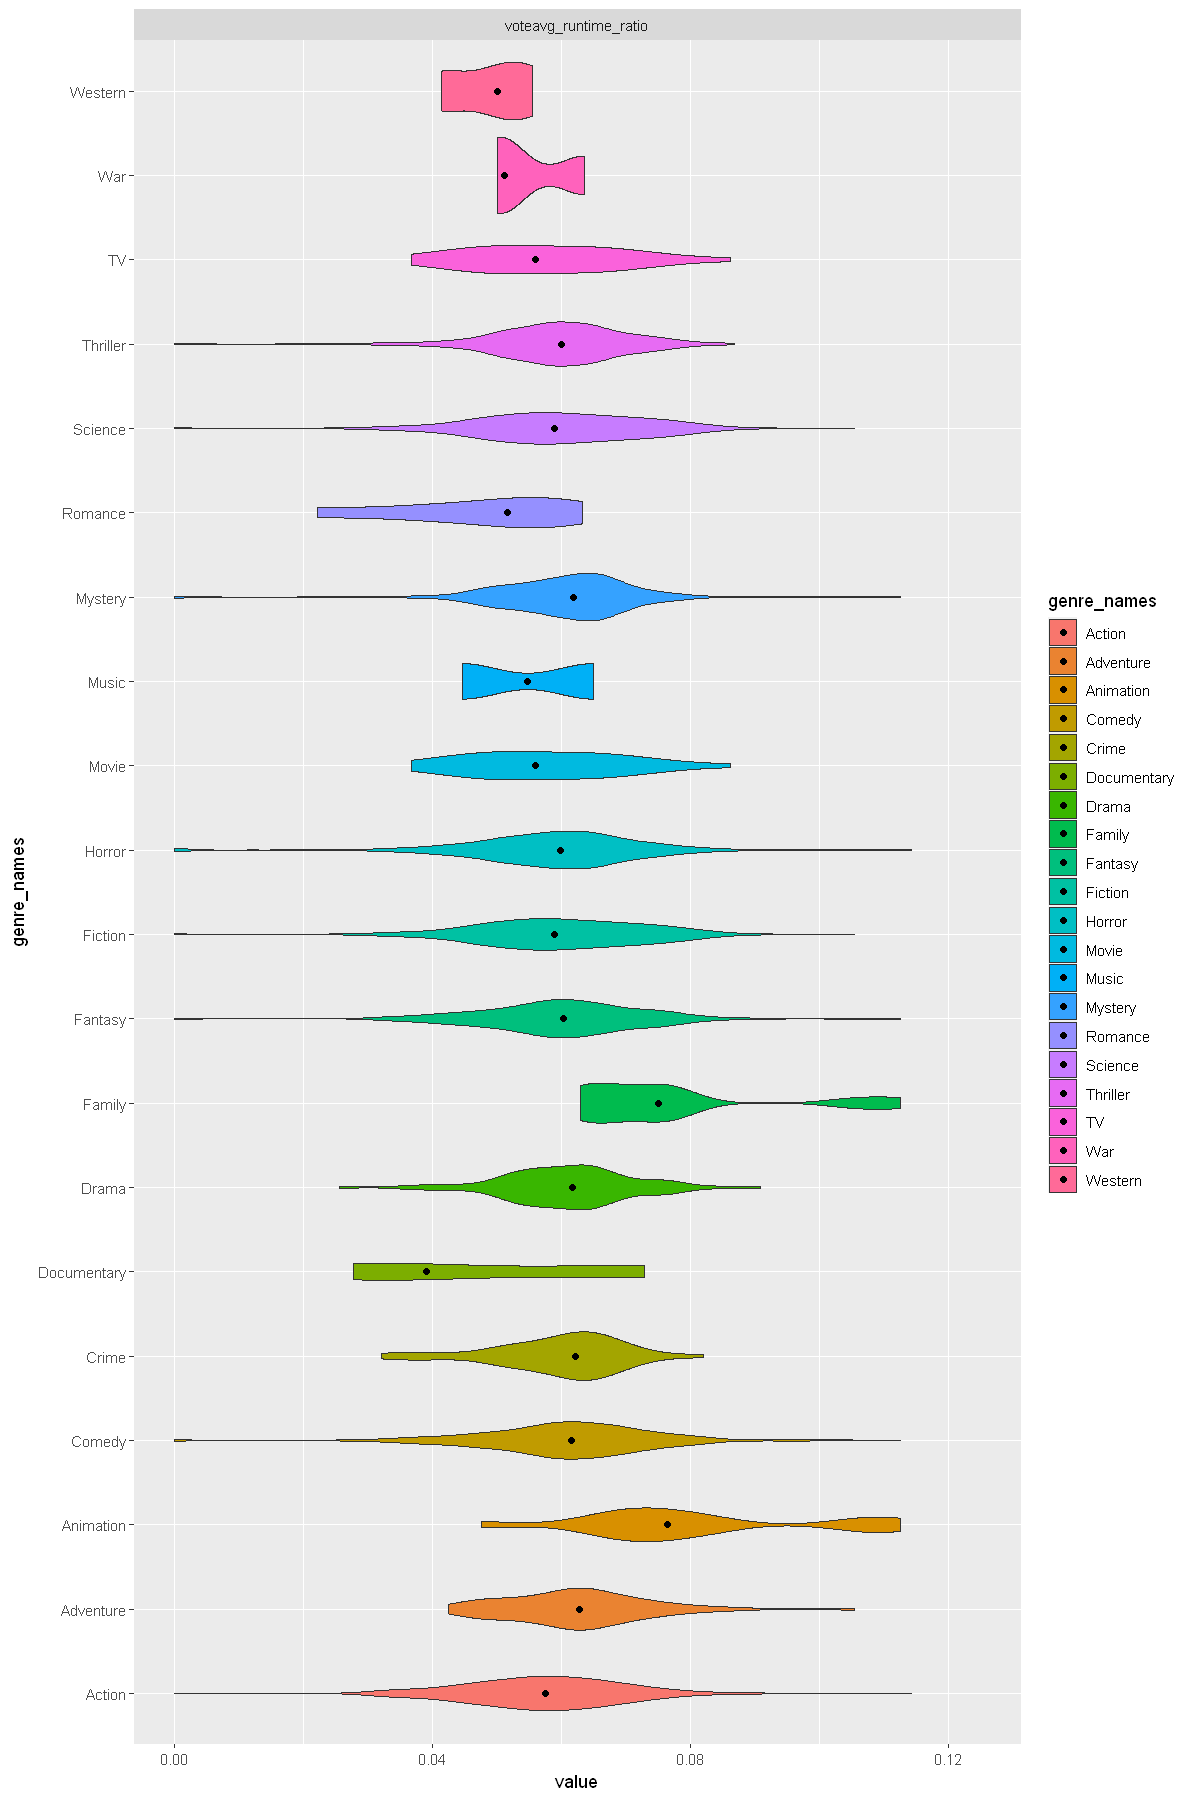

In [65]:
violin_genres

From the violin plot we can see that the horror movie with Family genre and Animation genre have the highest median of vote-time ratio, which indicate that they might be more popular with a rather shorter runtime than movie with other genres. And the Documentary genre has the lowest median of vote-time ratio. So, the runtime of horror movies with Documentary genre is the least effective to have positive influence on their votes.